# Experiment 2: Loan Amount Prediction using Linear Regression

**Load the dataset**

In [1]:
!pip install kagglehub

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("phileinsophos/predict-loan-amount-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/predict-loan-amount-data


In [5]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.linear_model import LinearRegression


training_df = pd.read_csv('/kaggle/input/predict-loan-amount-data/train.csv')
training_df.drop(['Customer ID', 'Name'], axis=1, inplace=True)
training_df.head(10)

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,...,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,495.81,N,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,171.95,N,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,298.54,N,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28
5,F,60,1234.92,Low,State servant,Secretaries,Rural,34434.72,181.48,N,...,684.12,1,Inactive,491,1234.92,2,Rural,1,43146.82,22382.57
6,M,43,2361.56,Low,Working,Laborers,Semi-Urban,152561.34,697.67,Y,...,637.29,0,Unpossessed,227,2361.56,1,Semi-Urban,1,221050.80,0.00
7,F,45,NaN,Low,State servant,Managers,Semi-Urban,240311.77,807.64,N,...,812.26,0,Active,314,NaN,2,Urban,1,401040.70,168218.24
8,F,38,1296.07,Low,Working,Cooking staff,Rural,35141.99,155.95,N,...,705.29,1,Active,241,1296.07,4,Rural,1,54903.44,22842.29
9,M,18,1546.17,Low,Working,Laborers,Rural,42091.29,500.20,N,...,613.24,0,Unpossessed,883,1546.17,2,Urban,1,67993.43,0.00


**Pre-process the data:**


• Handle missing values


• Encode categorical variables


• Normalize or standardize the features

In [6]:
training_df.isnull().sum()

,0
Gender,53
Age,0
Income (USD),4576
Income Stability,1683
Profession,0
Type of Employment,7270
Location,0
Loan Amount Request (USD),0
Current Loan Expenses (USD),172
Expense Type 1,0


In [7]:
from sklearn.preprocessing import LabelEncoder
# Handle missing values
for col in training_df.select_dtypes(include='object').columns:
    training_df[col].fillna(training_df[col].mode()[0], inplace=True)

for col in training_df.select_dtypes(include=np.number).columns:
    training_df[col].fillna(training_df[col].mean(), inplace=True)

# Encode categorical variables
label_enc = LabelEncoder()
for col in training_df.select_dtypes(include='object').columns:
    training_df[col] = label_enc.fit_transform(training_df[col])

/tmp/ipython-input-7-742444699.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  training_df[col].fillna(training_df[col].mode()[0], inplace=True)
/tmp/ipython-input-7-742444699.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

In [8]:
training_df.head(10)

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,0,56,1933.050000,1,7,14,1,72809.58,241.08,0,...,809.44,0,0,746,1933.05000,4,0,1,119933.46,54607.18
1,1,32,4952.910000,1,7,8,1,46837.47,495.81,0,...,780.40,0,2,608,4952.91000,2,0,1,54791.00,37469.98
2,0,65,988.190000,0,3,8,1,45593.04,171.95,0,...,833.15,0,2,546,988.19000,2,2,0,72440.58,36474.43
3,0,65,2630.574417,0,3,8,0,80057.92,298.54,0,...,832.70,1,2,890,2631.11944,2,1,1,121441.51,56040.54
4,0,31,2614.770000,1,7,6,1,113858.89,491.41,0,...,745.55,1,0,715,2614.77000,4,1,1,208567.91,74008.28
5,0,60,1234.920000,1,4,15,0,34434.72,181.48,0,...,684.12,1,1,491,1234.92000,2,0,1,43146.82,22382.57
6,1,43,2361.560000,1,7,8,1,152561.34,697.67,1,...,637.29,0,2,227,2361.56000,1,1,1,221050.80,0.00
7,0,45,2630.574417,1,4,10,1,240311.77,807.64,0,...,812.26,0,0,314,2631.11944,2,2,1,401040.70,168218.24
8,0,38,1296.070000,1,7,2,0,35141.99,155.95,0,...,705.29,1,0,241,1296.07000,4,0,1,54903.44,22842.29
9,1,18,1546.170000,1,7,8,0,42091.29,500.20,0,...,613.24,0,2,883,1546.17000,2,2,1,67993.43,0.00


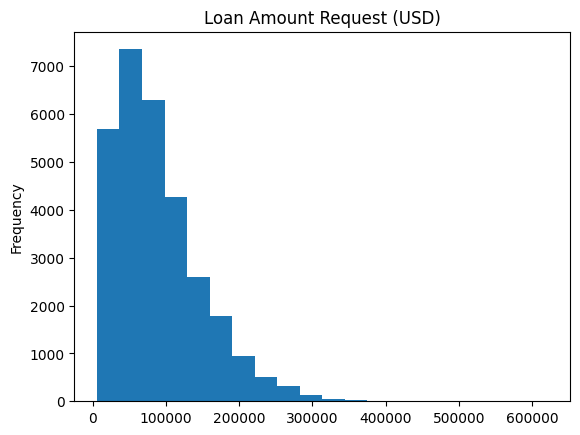

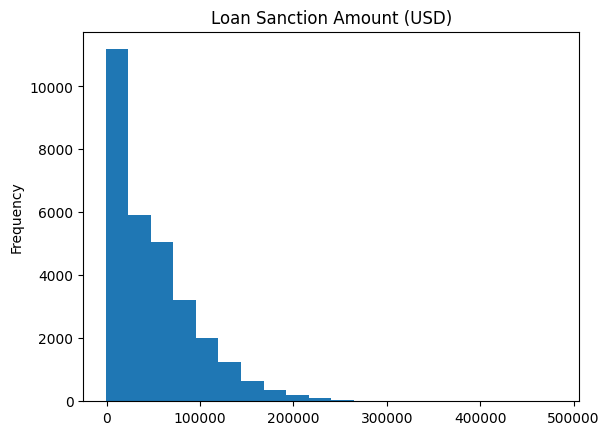

In [9]:
#Histogram: To understand the distribution of loan amounts
from matplotlib import pyplot as plt
training_df['Loan Amount Request (USD)'].plot(kind='hist', bins=20, title='Loan Amount Request (USD)')
plt.show()
training_df['Loan Sanction Amount (USD)'].plot(kind='hist', bins=20, title='Loan Sanction Amount (USD)')
plt.show()

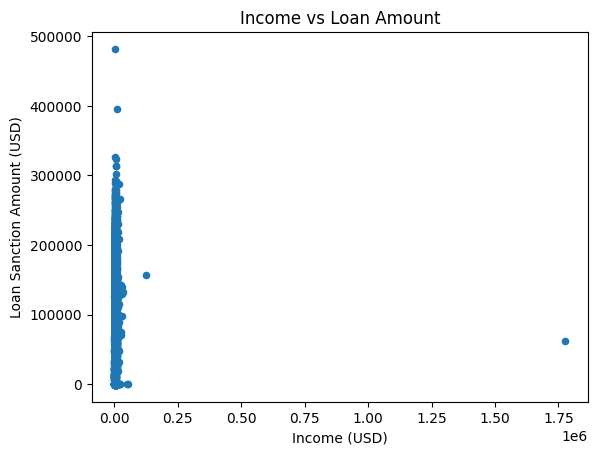

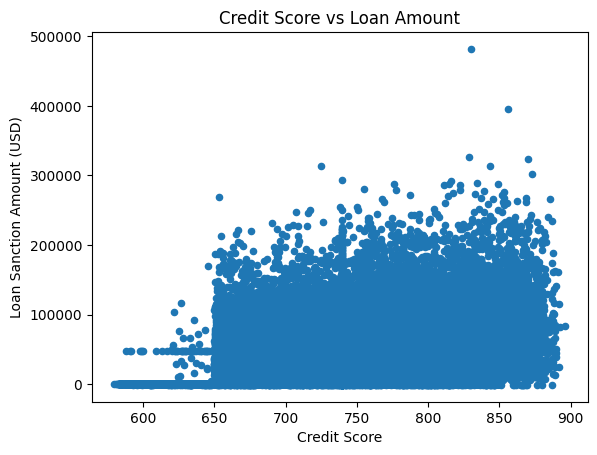

In [10]:
#Scatter Plots: To examine the relationship between key features and the loan amount.
training_df.plot(kind='scatter', x='Income (USD)', y='Loan Sanction Amount (USD)',title='Income vs Loan Amount')
plt.show()
training_df.plot(kind='scatter', x='Credit Score', y='Loan Sanction Amount (USD)',title='Credit Score vs Loan Amount')
plt.show()

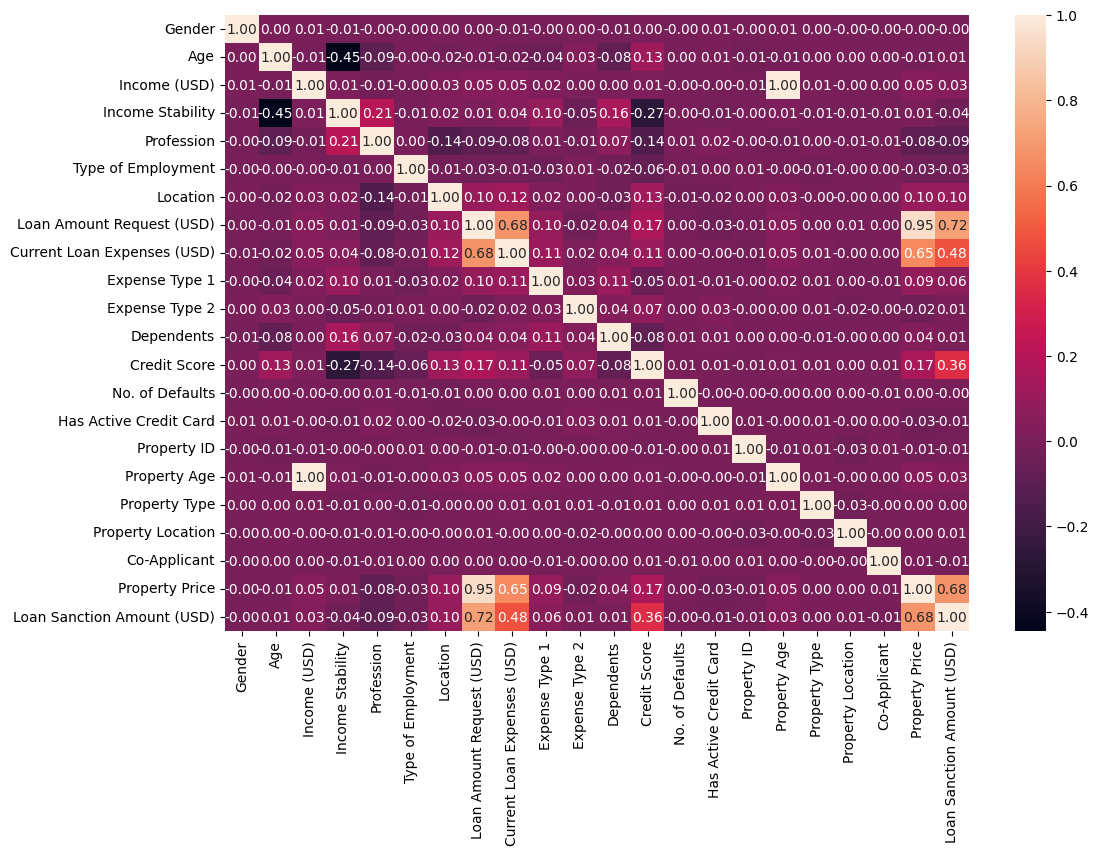

In [11]:
#Correlation Heatmap: To identify multicollinearity and relationships among features.
import seaborn as sns

plt.figure(figsize=(12, 8))

sns.heatmap(training_df.corr(),annot=True, fmt=".2f")
plt.show()

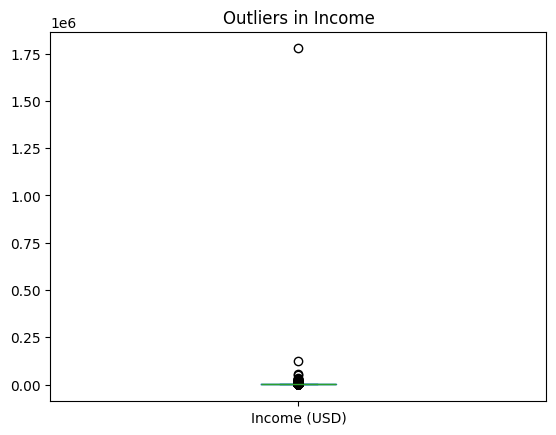

In [12]:
#Boxplots: To identify outliers in numerical features such as income.
training_df['Income (USD)'].plot(kind='box',title='Outliers in Income')
plt.show()

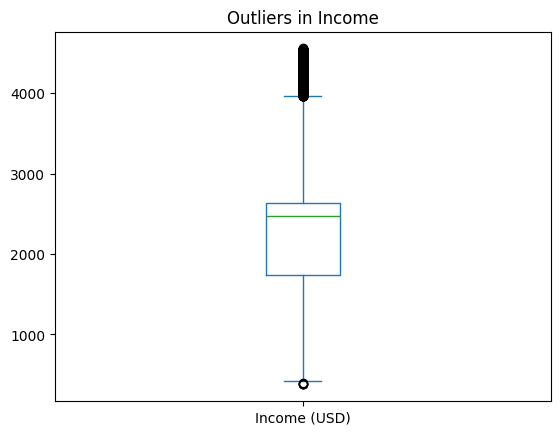

In [13]:
#handling outliers
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

outliers_income = detect_outliers_iqr(training_df['Income (USD)'])
training_df.loc[outliers_income, 'Income (USD)'] = training_df['Income (USD)'].median()


training_df['Income (USD)'].plot(kind='box',title='Outliers in Income')
plt.show()

In [14]:
#Splitting into training,testing and validating datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = training_df.drop(columns=['Loan Sanction Amount (USD)'])
features = X.columns
Y = training_df['Loan Sanction Amount (USD)']
scaler = StandardScaler()
X = scaler.fit_transform(X)
x_train,x_temp, y_train, y_temp = train_test_split(X,Y,test_size=0.2)
x_val,x_test, y_val, y_test = train_test_split(x_temp,y_temp,test_size=0.5)

In [15]:
#Training Linear Regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)



In [16]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,root_mean_squared_error
MAE = mean_absolute_error(y_true= y_test,y_pred=y_pred)
MSE = mean_squared_error(y_true= y_test,y_pred=y_pred)
r2 = r2_score(y_true= y_test,y_pred=y_pred)
RMSE = root_mean_squared_error(y_true= y_test,y_pred=y_pred)
adj_r2 = 1 - (1 - r2) * ((len(y_test) - 1) / (len(y_test) - X.shape[1] - 1))
print("MAE: ",MAE)
print("MSE: ",MSE)
print("R2 score: ",r2)
print("Root MSE: ",RMSE)

print("Adjusted R2 score: ",adj_r2)

MAE:  21960.48496835262
MSE:  1028921033.3430872
R2 score:  0.5582306411094848
Root MSE:  32076.798988413528
Adjusted R2 score:  0.5551154105733194


In [22]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
# Define KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores = []
mse_scores = []
r2_scores = []

print("K-Fold Cross Validation Results:\n")
fold = 1
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f"Fold {fold}: MAE={mae:.2f}, MSE={mse:.2f}, RMSE={rmse:.2f}, R2={r2:.2f}")

    mae_scores.append(mae)
    mse_scores.append(mse)
    r2_scores.append(r2)

    fold += 1

print("\nAverage Results:")
print(f"Average MAE: {np.mean(mae_scores):.2f}")
print(f"Average MSE: {np.mean(mse_scores):.2f}")
print(f"Average RMSE: {np.sqrt(np.mean(mse_scores)):.2f}")
print(f"Average R2 Score: {np.mean(r2_scores):.2f}")

K-Fold Cross Validation Results:

Fold 1: MAE=21721.46, MSE=992759227.36, RMSE=31508.08, R2=0.57
Fold 2: MAE=21872.96, MSE=979657503.58, RMSE=31299.48, R2=0.57
Fold 3: MAE=22358.09, MSE=1064323575.57, RMSE=32623.97, R2=0.54
Fold 4: MAE=21759.61, MSE=993344822.86, RMSE=31517.37, R2=0.58
Fold 5: MAE=20999.10, MSE=879813659.40, RMSE=29661.65, R2=0.61

Average Results:
Average MAE: 21742.25
Average MSE: 981979757.75
Average RMSE: 31336.56
Average R2 Score: 0.57


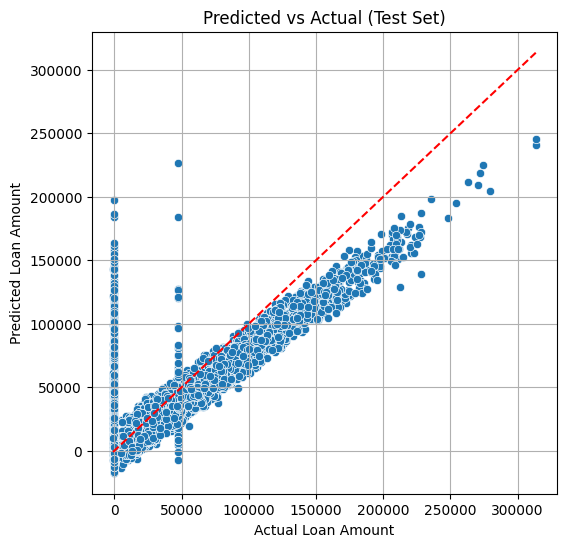

In [18]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Loan Amount")
plt.ylabel("Predicted Loan Amount")
plt.title("Predicted vs Actual (Test Set)")
plt.grid(True)
plt.show()


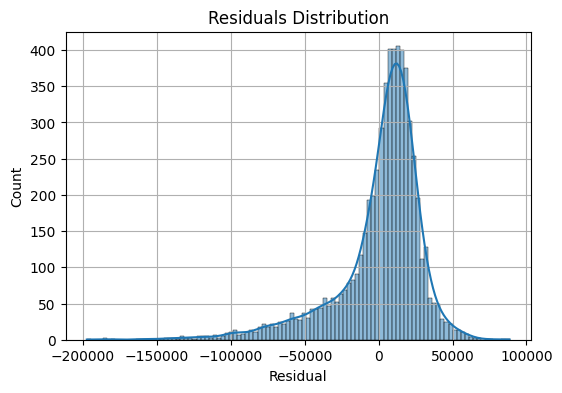

In [19]:

#Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residual")
plt.grid(True)
plt.show()


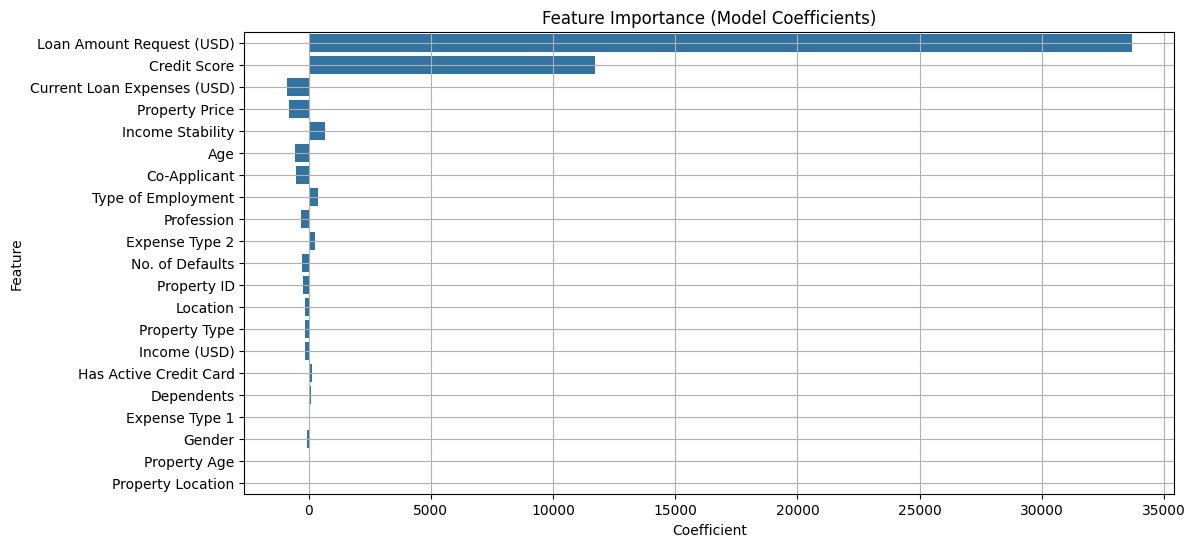

In [20]:
coeff_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=coeff_df, x='Coefficient', y='Feature')
plt.title("Feature Importance (Model Coefficients)")
plt.grid(True)
plt.show()

In [21]:
features

Index(['Gender', 'Age', 'Income (USD)', 'Income Stability', 'Profession',
       'Type of Employment', 'Location', 'Loan Amount Request (USD)',
       'Current Loan Expenses (USD)', 'Expense Type 1', 'Expense Type 2',
       'Dependents', 'Credit Score', 'No. of Defaults',
       'Has Active Credit Card', 'Property ID', 'Property Age',
       'Property Type', 'Property Location', 'Co-Applicant', 'Property Price'],
      dtype='object')